# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

2021-08-27 15:03:58.231614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-27 15:03:58.231633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Dataset

In [3]:
dataset = pd.read_csv('../data/processed_data/active_users_df_10PlusRatings_partial.csv')

In [4]:
anime_df = pd.read_csv('../data/raw_data/anime.csv')

In [76]:
dataset.head(50)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,21,10
4,0,24,9
5,0,4722,8
6,0,6098,6
7,0,3125,9
8,0,481,10
9,0,68,6


In [6]:
dataset.shape

(822418, 3)

In [97]:
dataset.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

In [99]:
dataset['rating'] = dataset['rating'].astype(float)

In [100]:
dataset.dtypes

user_id       int64
anime_id      int64
rating      float64
dtype: object

In [101]:
dataset = dataset.sort_values(["user_id", "anime_id"], ascending=(True, True))

In [102]:
dataset.head(50)

,user_id,anime_id,rating
3,0,21,10.0
4,0,24,9.0
0,0,67,9.0
9,0,68,6.0
14,0,121,9.0
28,0,164,8.0
37,0,169,7.0
39,0,174,4.0
36,0,199,8.0
45,0,235,10.0


# Order dataset by user_id and anime_id

In [103]:
num_users = len(dataset.user_id.unique())
num_animes = len(dataset.anime_id.unique())
print('Number of animes', num_animes)
print('Number of users', num_users)

Number of animes 12106
Number of users 4035


In [104]:
train, test = train_test_split(dataset, test_size=0.2)

In [105]:
train.head()

,user_id,anime_id,rating
421613,2464,10491,8.0
527239,3150,93,7.0
301207,1721,22199,8.0
645371,3871,21405,7.0
496387,2954,401,6.0


In [84]:
test.head()

,user_id,anime_id,rating
816520,4966,8769,7
375354,2183,30654,9
708255,4288,37655,6
154399,890,21809,6
231683,1335,6884,9


In [85]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (657934, 3)
test shape:  (164484, 3)


In [86]:
len(train.user_id)

657934

In [87]:
train = train.reset_index()

In [88]:
# 151519


train.anime_id.nunique()
num_animes

12106

In [89]:
num_animes

12106

# GMF


## Matrix factorisation

In [106]:
import pydot
import graphviz
%matplotlib inline

In [107]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge, concatenate
from tensorflow.keras.utils import model_to_dot
#from keras.utils.visualize_util import model_to_dot
from IPython.display import SVG

In [121]:
latent_dim

10

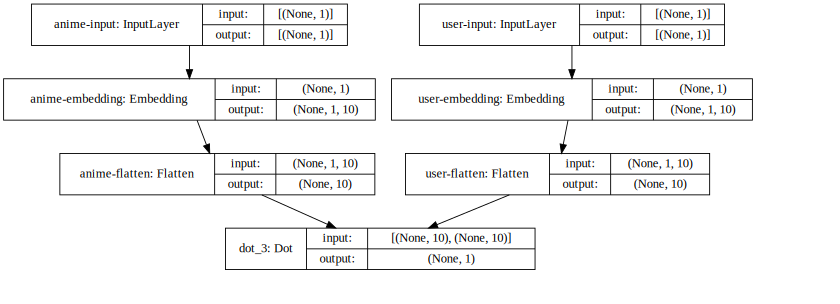

In [123]:
# Let's use a higher latent dimension.
latent_dim = 10

anime_input = Input(shape=[1],name='anime-input')
anime_embedding = Embedding(num_animes + 1, latent_dim, name='anime-embedding')(anime_input)
anime_vec = Flatten(name='anime-flatten')(anime_embedding)

user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)
from keras.layers import dot
prod = dot([anime_vec, user_vec], axes=1, normalize=False)

model = Model([user_input, anime_input], prod)
model.compile('adam', 'mean_squared_error'
              #,metrics=['mse']
             )
# display
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [113]:
print('user_input',user_input.shape)
print('anime_input',anime_input.shape)

user_input (None, 1)
anime_input (None, 1)


In [122]:
!pip show keras

Name: keras
Version: 2.6.0
Summary: TensorFlow Keras.
Home-page: https://keras.io/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/mijka/.local/lib/python3.9/site-packages
Requires: 
Required-by: tensorflow


In [124]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anime-input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
anime-embedding (Embedding)     (None, 1, 10)        121070      anime-input[0][0]                
__________________________________________________________________________________________________
user-embedding (Embedding)      (None, 1, 10)        40360       user-input[0][0]                 
____________________________________________________________________________________________

In [114]:
train.user_id.shape

(657934,)

In [115]:
train.anime_id.shape

(657934,)

In [117]:
train.rating.shape

(657934,)

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.user_id, train.anime_id], train.rating, epochs=)

Epoch 1/4


InvalidArgumentError:  indices[0,0] = 32959 is not in [0, 12107)
	 [[node model_7/anime-embedding/embedding_lookup (defined at tmp/ipykernel_30384/41650672.py:4) ]] [Op:__inference_train_function_6228]

Errors may have originated from an input operation.
Input Source operations connected to node model_7/anime-embedding/embedding_lookup:
 model_7/anime-embedding/embedding_lookup/5982 (defined at usr/lib/python3.9/contextlib.py:117)

Function call stack:
train_function


In [38]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.user_id, test.anime_id]), decimals=2)
y_true = test.rating
mean_absolute_error(y_true, y_hat)

NameError: name 'history' is not defined